In [2]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import json
import nltk 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

2024-01-12 21:30:10.793497: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-12 21:30:10.795180: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-12 21:30:10.820738: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-12 21:30:10.820760: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-12 21:30:10.821372: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
with open('chatres.json') as content:
    data =json.load(content)
    

In [4]:
tags =[]
patterns = []
responses = {}
for intent in data['intents']:
    responses[intent['tag']]= intent['responses']
    for lines in intent['patterns']:
        patterns.append(lines)
        tags.append(intent['tag'])

In [5]:
data1 = pd.DataFrame({"inputs" : patterns, "tags" : tags })

In [6]:
data1

,inputs,tags
0,What to do if Cuts?,Cuts
1,How to cure Cuts?,Cuts
2,Which medicine to apply for Cuts?,Cuts
3,what to apply on cuts?,Cuts
4,Cuts,Cuts
...,...,...
183,How to help a drowning person in CPR?,CPR
184,How do you treat a Fracture?,Fracture
185,what to do if i get a Fracture?,Fracture
186,Which medicine to take if I have a Fracture?,Fracture


In [7]:
import string 
data1['inputs'] = data1['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data1['inputs'] = data1['inputs'].apply(lambda wrd: ''.join(wrd))
data1

,inputs,tags
0,what to do if cuts,Cuts
1,how to cure cuts,Cuts
2,which medicine to apply for cuts,Cuts
3,what to apply on cuts,Cuts
4,cuts,Cuts
...,...,...
183,how to help a drowning person in cpr,CPR
184,how do you treat a fracture,Fracture
185,what to do if i get a fracture,Fracture
186,which medicine to take if i have a fracture,Fracture


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer #tokenizing is to remove space and encode the
# text. encode the output after tokenizer to make machine understand text.
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data1['inputs'])
train = tokenizer.texts_to_sequences(data1['inputs'])

from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data1['tags'])


In [9]:
input_shape= x_train.shape[1]
print(input_shape)

11


In [10]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words :  131
output length:  44


In [11]:
#created LSTM model 
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x =  LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model =Model(i,x)



In [12]:
#compilign the modal
model.compile(loss= "sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [13]:
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 3.7866 - accuracy: 0.0160
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 3.7832 - accuracy: 0.0266
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 3.7810 - accuracy: 0.0372
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 3.7786 - accuracy: 0.0691
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 3.7764 - accuracy: 0.0691
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 3.7739 - accuracy: 0.0691
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 3.7709 - accuracy: 0.0851
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 3.7677 - accuracy: 0.0904
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 3.7640 - accuracy: 0.0904
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 3.7594 - accuracy: 0.1170
Epoch 11/200
6/6 [===========

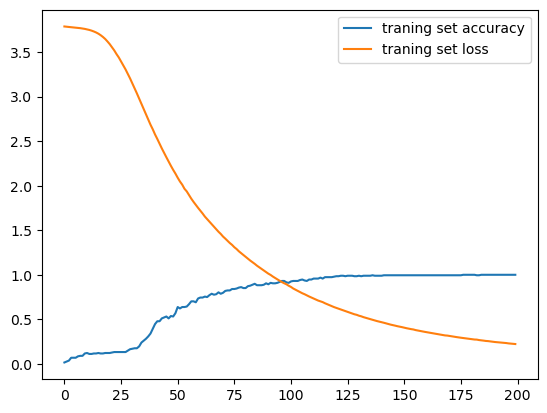

In [14]:
plt.plot(train.history['accuracy'],label='traning set accuracy')
plt.plot(train.history['loss'],label='traning set loss')
plt.legend()

In [ ]:
import random
import numpy as np
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you have a trained model and responses defined
# You need to replace `model`, `tokenizer`, and `responses` with your actual model, tokenizer, and responses.

# Initialize Tokenizer
tokenizer = Tokenizer()
# Load your trained tokenizer, e.g., tokenizer.fit_on_texts(your_texts)

while True:
    # User input
    prediction_input = input('You: ')

    # Preprocess user input
    prediction_input = ''.join([letters.lower() for letters in prediction_input if letters not in string.punctuation])
    texts_p = []
    texts_p.append(prediction_input)

    # Tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input], maxlen=input_shape)

    # Getting output from the model
    output = model.predict(prediction_input)

    # Finding the right tag and predicting
    response_tag = le.inverse_transform([output.argmax()])[0]

    # Printing a random response
    print("Sanjay: ", random.choice(responses[response_tag]))

    # If the response tag is "cuts," break the loop
    if response_tag == "cuts":
        break



You:  cuts


1/1 [==============================] - 0s 337ms/step
Sanjay:  To treat a fever at home: 1)Drink plenty of fluids to stay hydrated. 2)Dress in lightweight clothing. 3)Use a light blanket if you feel chilled, until the chills end. 4)Take acetaminophen (Tylenol, others) or ibuprofen (Advil, Motrin IB, others). 5) Get medical help if the fever lasts more than five days in a row.


You:  hello


1/1 [==============================] - 0s 10ms/step
Sanjay:  To treat a fever at home: 1)Drink plenty of fluids to stay hydrated. 2)Dress in lightweight clothing. 3)Use a light blanket if you feel chilled, until the chills end. 4)Take acetaminophen (Tylenol, others) or ibuprofen (Advil, Motrin IB, others). 5) Get medical help if the fever lasts more than five days in a row.


You:  cuts


1/1 [==============================] - 0s 11ms/step
Sanjay:  To treat a fever at home: 1)Drink plenty of fluids to stay hydrated. 2)Dress in lightweight clothing. 3)Use a light blanket if you feel chilled, until the chills end. 4)Take acetaminophen (Tylenol, others) or ibuprofen (Advil, Motrin IB, others). 5) Get medical help if the fever lasts more than five days in a row.


You:  cut


1/1 [==============================] - 0s 11ms/step
Sanjay:  To treat a fever at home: 1)Drink plenty of fluids to stay hydrated. 2)Dress in lightweight clothing. 3)Use a light blanket if you feel chilled, until the chills end. 4)Take acetaminophen (Tylenol, others) or ibuprofen (Advil, Motrin IB, others). 5) Get medical help if the fever lasts more than five days in a row.
